In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # print(data_temp.size)
    return data_temp

In [7]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "Mean" in path:
            continue
        elif "LogitNorm_BNinit0" in path:
            data["Mode"] += "LogitNorm+BN"
            continue
        elif "BN00+G00" in path:
            data["Mode"] += "_BN00"
            continue
        elif "BN00+G01" in path:
            data["Mode"] += "_BN01"
            continue
        elif "BNinit0" in path:
            data["Mode"] += "BNinit0"
            continue
        elif "fc" in path:
            continue
        elif "ec" in path:
            continue

        if "ortho" in path: continue
        if "GNStop" in path: continue
        if "G15" in path: continue
        if "SWA" in path: continue
        if "FConly" in path: continue

        if "FCs0.5E1" in path: 
            data["Mode"] += "_s05e1"
            # continue
        elif "FCs0.1E1" in path: 
            data["Mode"] += "_s01e1"
            # continue
        elif "FCs0.05E1" in path: 
            data["Mode"] += "_s005e1"
            # continue
        elif "FCs0.01E1" in path: 
            data["Mode"] += "_s001e1"
            # continue
        elif "FCs0.5E2" in path: 
            data["Mode"] += "_s05e2"
            # continue
        elif "FCs0.1E2" in path: 
            data["Mode"] += "_s01e2"
            # continue
        elif "FCs0.05E2" in path: 
            data["Mode"] += "_s005e2"
            # continue
        elif "FCs0.01E2" in path: 
            data["Mode"] += "_s001e2"
            # continue

        if "w1b1" in path: 
            data["Mode"] += "_w1b1"
            # continue
        elif "w1" in path: 
            data["Mode"] += "_w1"
            # continue
        elif "b1" in path: 
            data["Mode"] += "_b1"
            continue

        if "__PCOS1/" in path and "G05":
            data["Mode"] += "_PCOS1"
            # continue        
        if "PCOS1_Mean5-LR0.1" in path and "G05" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
        elif "PCOS1_Mean5-LR1.0" in path and "G15" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue
        elif "PCOS1_Mean5-LR2.0" in path and "G15" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue
        
        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

[Text(0, 0, 'fedavg_s001e1_w1b1'), Text(1, 0, 'fedavg_s01e2_w1'), Text(2, 0, 'fedavg_s001e2_w1b1'), Text(3, 0, 'fedavg_s01e1_w1b1'), Text(4, 0, 'scaffold'), Text(5, 0, 'fedavg_s05e2_w1b1'), Text(6, 0, 'fedavg_s05e1_w1'), Text(7, 0, 'fedavg_s05e1_w1b1'), Text(8, 0, 'fedavg_s005e2_w1b1'), Text(9, 0, 'fedavg_PCOS1'), Text(10, 0, 'fedavg_s01e1_w1'), Text(11, 0, 'fedprox'), Text(12, 0, 'fedavg_s05e2_w1'), Text(13, 0, 'fedavg_s005e1_w1b1'), Text(14, 0, 'fedavg'), Text(15, 0, 'feddyn'), Text(16, 0, 'fedavg_s01e2_w1b1')]


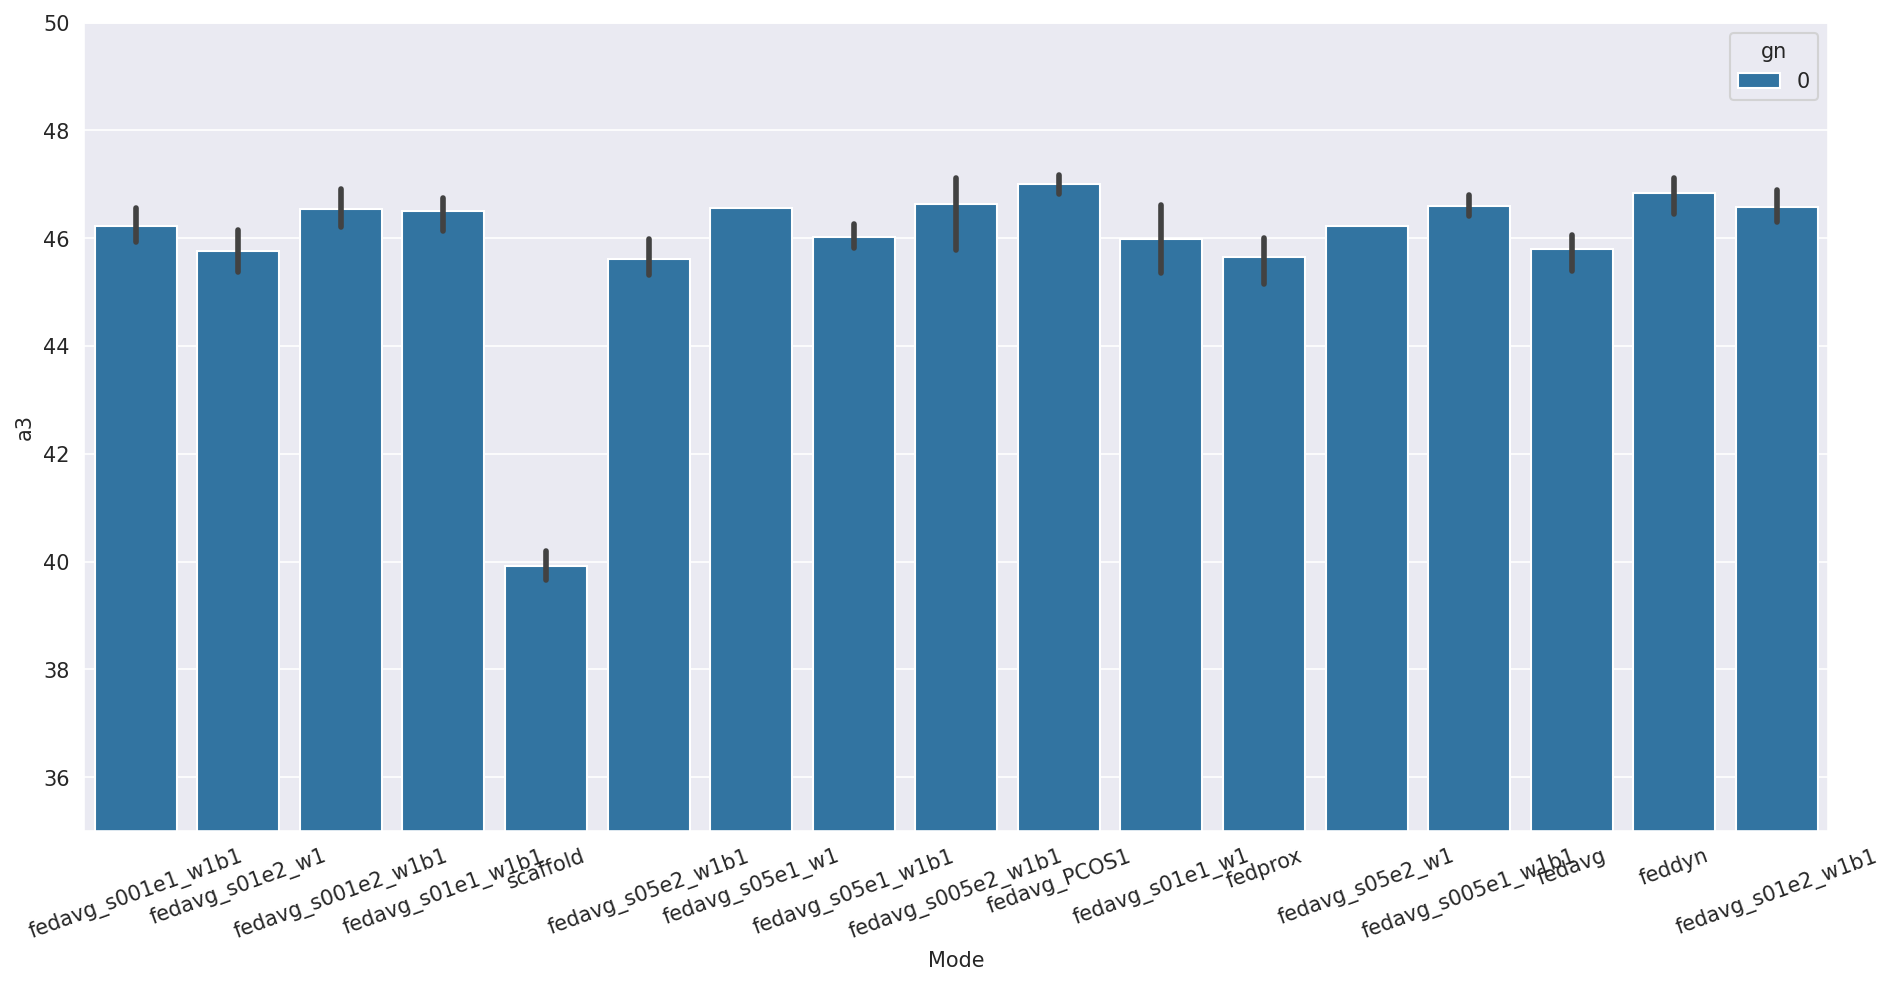

In [13]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=150, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["epoch"] == 999)]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold")]
    # temp = temp[(temp["Mode"] != "fedavg") & (temp["Mode"] != "fedavg_PCOS1")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="gn", ax=ax)
    ax.set_ylim([35,50])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
print(ax.get_xticklabels())

In [ ]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddyn") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    # temp = temp[(temp["Mode"] != "fedavg") & (temp["Mode"] != "fedavg_PCOS1")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax)
    ax.set_ylim([20,60])